## **Hyperparameter Optimization For `Xgboost` using `RandomizedSearchCV`**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('./data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

## **Correlation**

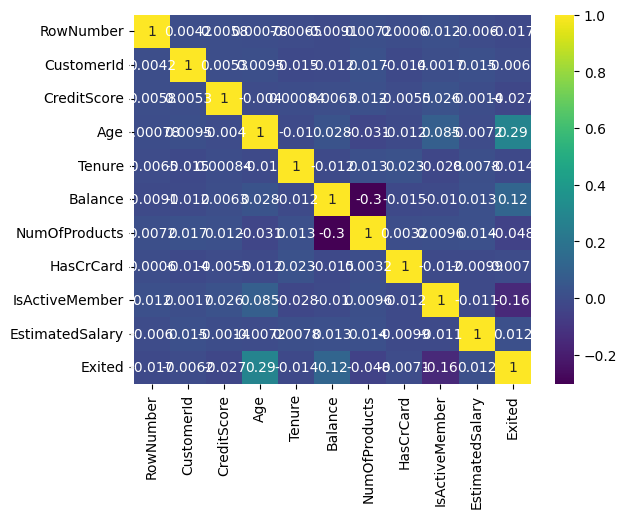

In [4]:
corrmat = df.corr(numeric_only=True)
top_corr_features = corrmat.index
plt.Figure(figsize=(20,20))

g  = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='viridis')

In [5]:
# Independent and Dependent Features
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
geography = pd.get_dummies(X['Geography'], drop_first=True)

In [8]:
geography.head()

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


In [9]:
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [10]:
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [11]:
X = X.drop(['Geography', 'Gender'], axis=1)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [13]:
X = pd.concat([X, geography, gender], axis=1)

In [14]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [15]:
# Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [19]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [18]:
import datetime


def time(start_time = None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, time, round(tsec, 2)))

In [26]:
classifier = xgboost.XGBClassifier()

In [27]:
random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=1, cv=5, verbose=3)

In [28]:
from timeit import default_timer as timer

start_time = timer()   # start timing
random_search.fit(X, y)
end_time = timer()     # end timing

print("Time taken:", end_time - start_time)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=1;, score=0.837 total time=   0.7s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=1;, score=0.847 total time=   0.8s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=1;, score=0.844 total time=   0.4s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=1;, score=0.848 total time=   0.4s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=1;, score=0.834 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3;, score=0.862 total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3;, score=0.864 total time=   0.0s
[CV 3/5] END colsample_by

In [29]:
random_search.best_estimator_

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.5
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [30]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.15,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [31]:
classifier = xgboost.XGBClassifier(
    objective='binary:logistic',
    colsample_bytree=0.5,
    gamma=0.2,
    learning_rate=0.15,
    max_depth=4,
    min_child_weight=3,
    eval_metric='logloss',
    random_state=42
)


In [32]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=10)

In [33]:
score

array([0.88 , 0.864, 0.874, 0.867, 0.86 , 0.857, 0.86 , 0.874, 0.852,
       0.858])

In [34]:
score.mean()

np.float64(0.8646)